In [13]:
import pandas as pd
import numpy as np
from math import sqrt
import random
from tabulate import tabulate
import os
from pathlib import Path
import matplotlib.pyplot as plt

list_categories_str = [ "contribution", "strenghts", "weakness", "repro", "detailed", "justifictation" ]

In [14]:
output_directory = "../miccai2022/"
path_words_count = output_directory + "count_words.csv"
df_words = pd.read_csv(path_words_count, sep= "\t",  header=[0, 1], index_col=[0,1], skip_blank_lines=True)

In [15]:
for id, id_df in df_words.groupby(level=0):
    for _, title in id_df.index.values:
        for i in range (1,4):
            df_words.loc[(id,title), ("total", f"review {i}")] = 0
                    
        for category in list_categories_str :
            for i in range (1,4):
                df_words.loc[(id,title), ("total", f"review {i}")] += df_words.loc[(id,title), (category, f"review {i}")]
                            
df_words.sort_index(axis = 1, ascending=True, inplace=True)
df_words.to_csv(os.path.join(output_directory ,f'count_words.csv'), index = True, sep="\t", encoding='utf-8')
    

In [16]:
#

import statistics
df_resume = pd.DataFrame(columns=["category","mean","max", "min", "mediane", "variance"], )
df_resume.set_index(["category"], inplace= True)

for category in list_categories_str :
        list_words = df_words.loc[:,(category, "review 1")].values.tolist() + df_words.loc[:,(category, "review 2")].values.tolist() + df_words.loc[:,(category, "review 3")].values.tolist()
        newlist = [x for x in list_words if pd.isnull(x) == False]
        df_resume.loc[(category), "mean"]  = statistics.mean(newlist)
        df_resume.loc[(category), "mediane"]  = statistics.median(newlist)
        df_resume.loc[(category), "max"]  = max(newlist)
        df_resume.loc[(category), "min"]  = min(newlist)
        df_resume.loc[(category), "variance"]  = statistics.variance(newlist) ## TO CHECK 

print(tabulate(df_resume, headers='keys', tablefmt='psql'))


+----------------+----------+-------+-------+-----------+------------+
| category       |     mean |   max |   min |   mediane |   variance |
|----------------+----------+-------+-------+-----------+------------|
| contribution   |  55.3561 |   162 |     1 |        50 |    798.597 |
| strenghts      |  49.5499 |   302 |     0 |        42 |   1103.67  |
| weakness       |  88.4956 |   507 |     1 |        64 |   6278     |
| repro          |  22.3339 |   382 |     1 |        15 |    774.232 |
| detailed       | 114.27   |  1261 |     1 |        75 |  15922.3   |
| justifictation |  32.4378 |   170 |     1 |        27 |    576.757 |
+----------------+----------+-------+-------+-----------+------------+


In [17]:
repro_list = df_words.loc[:,("repro", "review 1")].values.tolist() + df_words.loc[:,("repro", "review 2")].values.tolist() + df_words.loc[:,("repro", "review 3")].values.tolist()
repro_list = [x for x in repro_list if pd.isnull(x) == False]

total_list = df_words.loc[:,("total", "review 1")].values.tolist() + df_words.loc[:,("total", "review 2")].values.tolist() + df_words.loc[:,("total", "review 3")].values.tolist()
total_list = [x for x in total_list if pd.isnull(x) == False]

import scipy
res_tt = scipy.stats.ttest_ind(repro_list, total_list)

print(res_tt.statistic)
print(res_tt.pvalue)
print(res_tt)
print(res_tt.df)

-70.06245914529322
0.0
TtestResult(statistic=-70.06245914529322, pvalue=0.0, df=3424.0)
3424.0


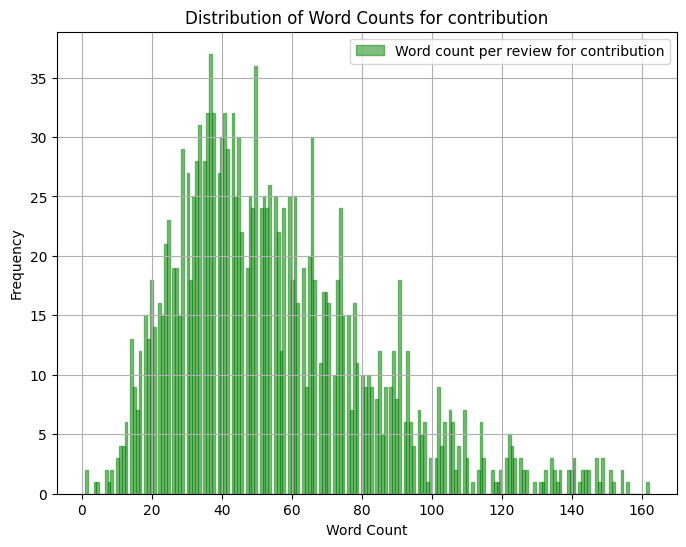

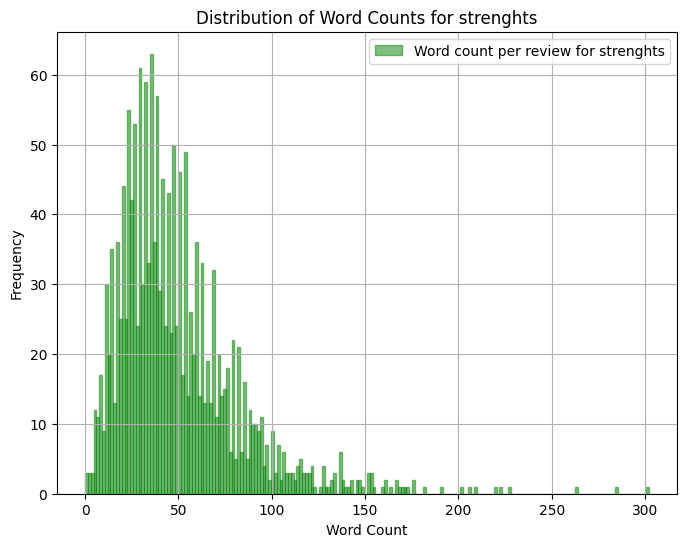

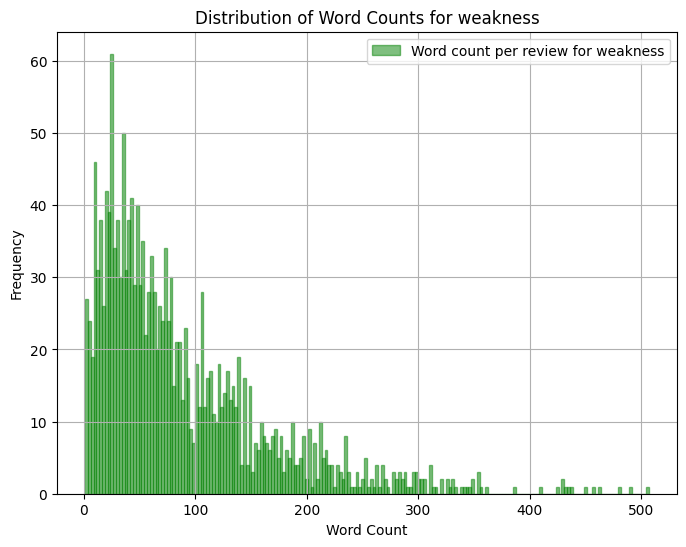

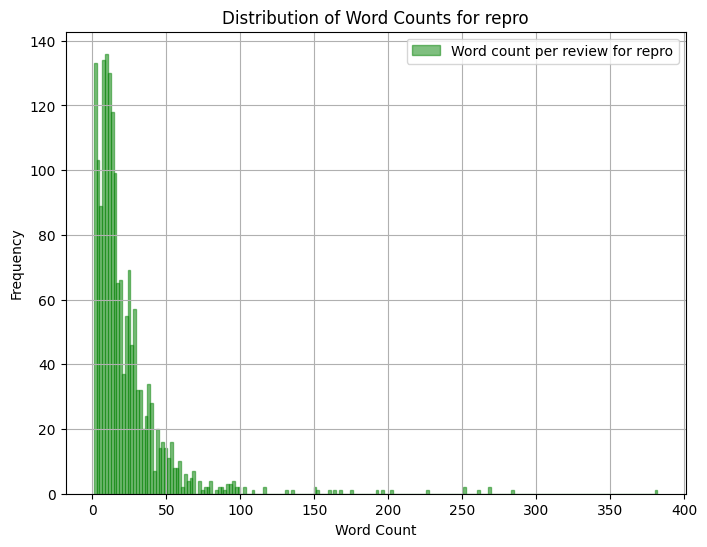

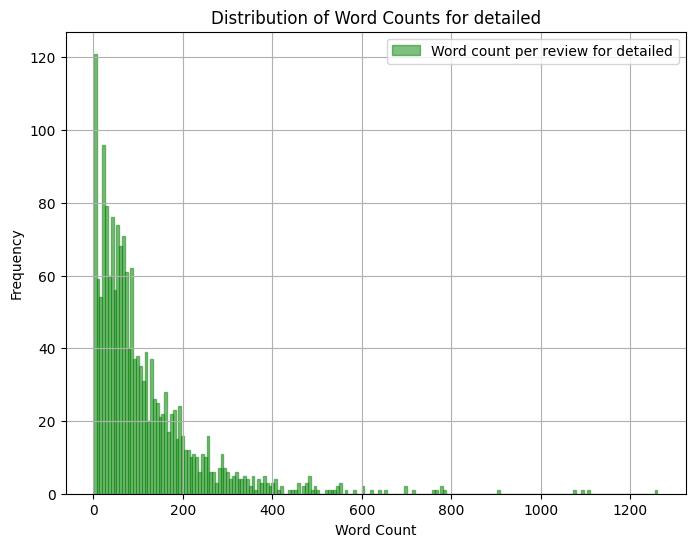

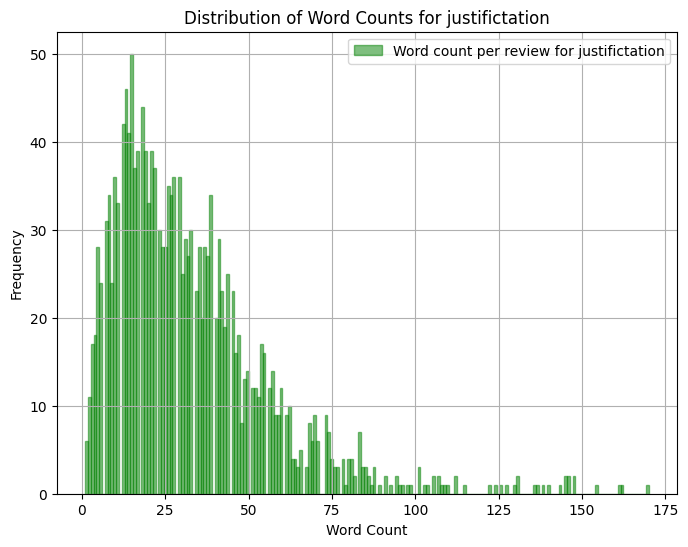

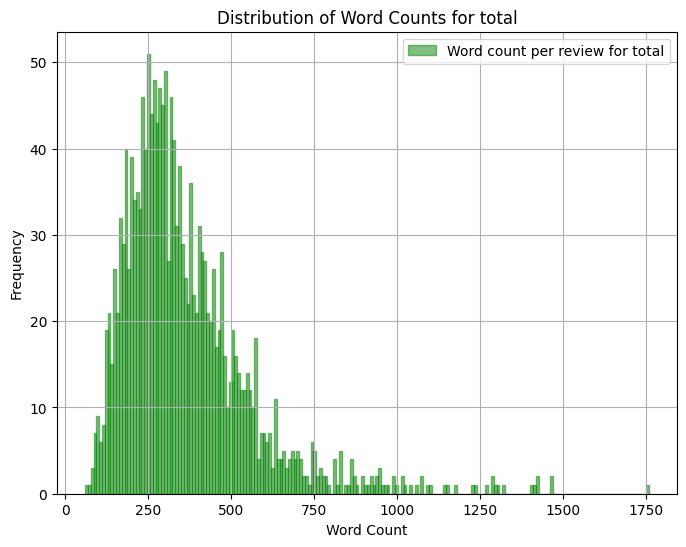

In [18]:
histo_path = Path(output_directory) / "histo"
if not histo_path.is_dir():
    os.mkdir(histo_path)

for category in list_categories_str + ["total"] :

    list = df_words.loc[:,(category, "review 1")].values.tolist() + df_words.loc[:,(category, "review 2")].values.tolist() + df_words.loc[:,(category, "review 3")].values.tolist()

    plt.figure(figsize=(8, 6))
    plt.hist(list, bins=200, alpha=0.5, edgecolor='g', color='g', label=f"Word count per review for {category}")

    plt.title(f'Distribution of Word Counts for {category}')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(histo_path, f"{category}_hist_count_words"))